<h1>Preparing the Dataset</h1>

In [45]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [46]:
tf.random.set_seed(30)
np.random.seed(30)

In [47]:
dataset = pd.read_csv('../Datasets/HousingPrices.csv')
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [48]:
print(dataset.shape)
dataset.describe().transpose()

(545, 13)


,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [49]:
dataset.drop(columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'],inplace=True)

In [50]:
areas = dataset['area']
price = dataset['price']

Text(0, 0.5, 'y ~ Dependent Variable ~ price')

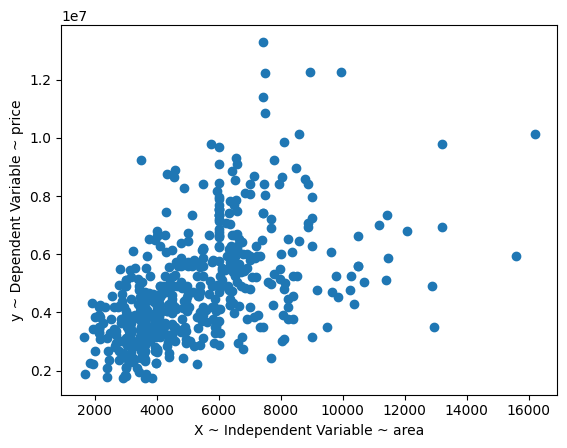

In [51]:
plt.scatter(areas,price)
plt.xlabel('X ~ Independent Variable ~ area')
plt.ylabel('y ~ Dependent Variable ~ price')

<h1>Normalizing the Data</h1>

The data ranges from 0 - 1 after you normalize the data. The general formula for Normalizing the data is 
(data - minimum)/(maxium - minimum)<br><br>
As we are trying to predict 'price' from 'area', area will be the feature and price will be the label.


In [52]:
train_dataset = dataset.sample(frac=0.7)
test_dataset = dataset.drop(train_dataset.index)

train_features = (train_dataset-np.min(train_dataset))/(np.max(train_dataset)-np.min(train_dataset))
test_features = (test_dataset-np.min(test_dataset))/(np.max(test_dataset)-np.min(test_dataset))

train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

In [53]:
area = np.array(train_features['area'])
area_normalizer = tf.keras.layers.Normalization(input_shape=[1,],axis=None)
area_normalizer.adapt(area)

<h1>Building The Model</h1>

once we're good with the data, we build the model, and train it.

In [54]:
model = tf.keras.Sequential([
    area_normalizer,
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

the following command provides you with the summary of the model.

we give the suitable optimizer, loss functions, and the metrics you care about. It can be Mean Absolute Error or Mean Squared Error in this case, whichever performs best

In [55]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),loss='mean_absolute_error',metrics=['mae'])

In [56]:
history = model.fit(train_features['area'],train_labels, epochs=500, validation_split=0.2)

Epoch 1/500
10/10 [==============================] - 0s 12ms/step - loss: 0.2374 - mae: 0.2374 - val_loss: 0.1450 - val_mae: 0.1450
Epoch 2/500
10/10 [==============================] - 0s 3ms/step - loss: 0.1621 - mae: 0.1621 - val_loss: 0.1303 - val_mae: 0.1303
Epoch 3/500
10/10 [==============================] - 0s 3ms/step - loss: 0.1437 - mae: 0.1437 - val_loss: 0.1185 - val_mae: 0.1185
Epoch 4/500
10/10 [==============================] - 0s 3ms/step - loss: 0.1138 - mae: 0.1138 - val_loss: 0.0955 - val_mae: 0.0955
Epoch 5/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0969 - mae: 0.0969 - val_loss: 0.0878 - val_mae: 0.0878
Epoch 6/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0902 - mae: 0.0902 - val_loss: 0.0879 - val_mae: 0.0879
Epoch 7/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0872 - mae: 0.0872 - val_loss: 0.0887 - val_mae: 0.0887
Epoch 8/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0870 - 

In [57]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,val_loss,val_mae,epoch
495,0.083854,0.083854,0.089502,0.089502,495
496,0.084158,0.084158,0.089168,0.089168,496
497,0.085907,0.085907,0.089385,0.089385,497
498,0.084895,0.084895,0.091009,0.091009,498
499,0.085385,0.085385,0.087398,0.087398,499


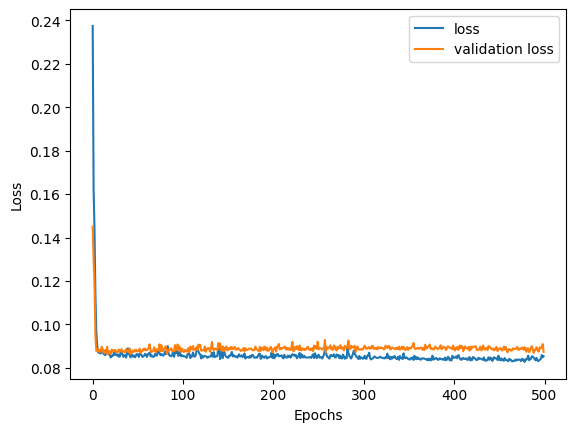

In [58]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

evaluate method evaluates your model, based on data you provide.

In [59]:
results = model.evaluate(test_features['area'], test_labels)

print(results)
print(hist['mae'].mean())

6/6 [==============================] - 0s 935us/step - loss: 0.1362 - mae: 0.1362
[0.1361808478832245, 0.1361808478832245]
0.08584729000926018


linspace is a method to create tensor inputs of given requirements, which in this case is to generate 20001 tensor inputs from 0 to 20000

In [60]:
x = tf.linspace(0,20000,20001)
y=model.predict(x)

626/626 [==============================] - 0s 363us/step


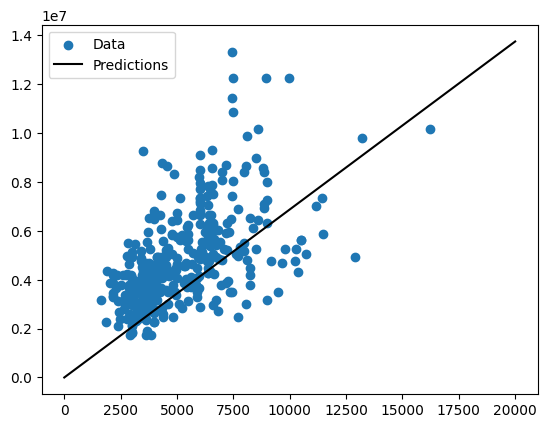

In [61]:
plt.scatter(train_dataset['area'], train_dataset['price'],label='Data')
plt.plot(x,y,label='Predictions', color='black')
plt.legend()